Importando Dataset

https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering/notebook

https://www.kaggle.com/code/asmaasultan/clustering-techniques

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

Tratando dados

In [2]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
drop_columns = ["ID", 'Z_CostContact', 'Z_Revenue']
df = df.drop(drop_columns, axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [3]:
from datetime import datetime

for row in range(len(df["Dt_Customer"])):
  df["Dt_Customer"][row] = datetime.strptime(df["Dt_Customer"][row], '%d-%m-%Y').year 
  
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [4]:
nominal_at = ['Education', 'Marital_Status', 'Dt_Customer']
le = LabelEncoder()

for atribute in nominal_at:
  df[atribute] = le.fit_transform(df[atribute])

df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,2,4,58138.0,0,0,0,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,2,4,46344.0,1,1,2,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,2,5,71613.0,0,0,1,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,2,5,26646.0,1,0,2,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,4,3,58293.0,1,0,2,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [5]:
df = df.drop(df[np.isnan(df['Income'])].index)
df.drop(['Dt_Customer'],inplace=True, axis = 1)

In [6]:
from sklearn.preprocessing import RobustScaler

df_Robus = RobustScaler().fit_transform(df)
df_Robus = pd.DataFrame(df)
df_Robus.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,2,4,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,2,4,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,2,5,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,2,5,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,4,3,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   int64  
 2   Marital_Status       2216 non-null   int64  
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Recency              2216 non-null   int64  
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   i

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

df_hier = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage= 'average').fit(df_Robus)
print(silhouette_score(df_Robus, df_hier.labels_))

0.5554551583245877


In [10]:
from sklearn.decomposition import PCA
silhouette_hier = []
for i in range(2,35):
  df_PCA = PCA(n_components = i, copy = False).fit_transform(df_Robus)

  d_hier = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage= 'average').fit(df_PCA)
  silhouette_hier.append(round(silhouette_score(df_PCA, d_hier.labels_),4))

In [11]:
print("Hierarchical")
print(silhouette_hier)

Hierarchical
[0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555]


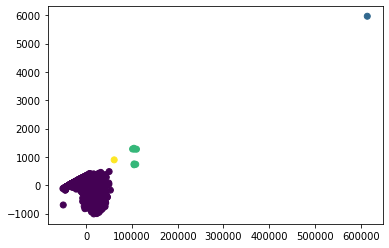

In [12]:
import matplotlib.pyplot as plt

df_PCA = pd.DataFrame(PCA(n_components = 2, copy = False).fit_transform(df_Robus))
    
d_hier = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage= 'average').fit(df_PCA)
df_PCA['Cluster'] = d_hier.labels_

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])

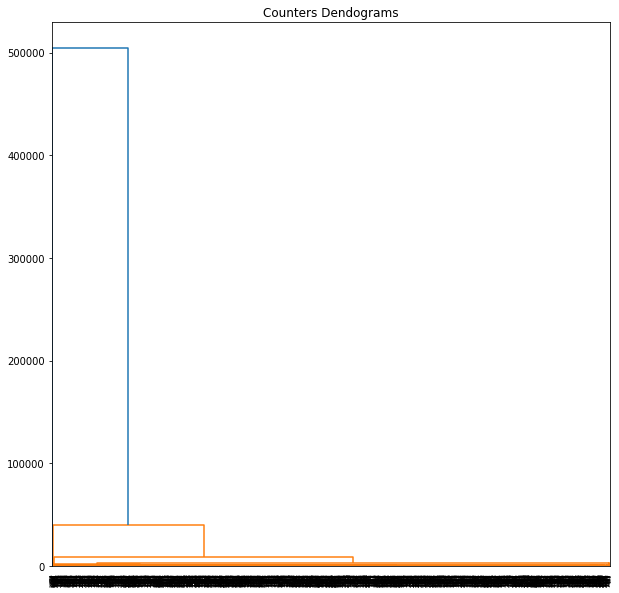

In [13]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 10))
plt.title("Counters Dendograms")
dend_avg = shc.dendrogram(shc.linkage(y=df_PCA , method='average',metric='euclidean')
                          ,orientation='top') 